Network analysis of a dependency call graph can provide valuable insights into the structure and complexity of your codebase, guiding various refactoring decisions to improve maintainability, readability, and performance. Here are some decisions one could make based on different metrics and analyses:

1. **Reduce Complexity by Breaking Down Highly Connected Nodes**: Nodes with high out-degree centrality (i.e., modules or functions that depend on many others) might indicate complex components that could be simplified or broken down into smaller, more manageable pieces.

2. **Identify and Eliminate Circular Dependencies**: Cycles in the dependency graph indicate circular dependencies, which can complicate the architecture and make the system harder to understand and maintain. Refactoring to eliminate these cycles can simplify the dependency structure.

3. **Reorganize Code to Improve Modularity**: Analysis of strongly and weakly connected components can help identify parts of the code that are too tightly coupled or too loosely connected. You might decide to refactor code to improve modularity, making it easier to understand, test, and maintain.

4. **Optimize Critical Paths**: Path analysis, including finding the longest paths (which might indicate the deepest dependency chains), can help identify critical paths in your application. Refactoring to shorten these paths can improve performance and reduce the impact of changes.

5. **Decouple High Betweenness Centrality Nodes**: Nodes with high betweenness centrality act as bridges between different parts of the graph. These might be modules or functions that couple different parts of your system together. Refactoring to reduce their betweenness can help decouple your system's components, improving modularity and potentially reducing the risk of changes in one area rippling through to others.

6. **Consolidate or Remove Redundant Dependencies**: The dependency graph can reveal redundant dependencies or isolated nodes (modules or functions that are not depended upon or do not depend on others). You might decide to consolidate similar functionalities or remove unused or unnecessary dependencies to simplify the codebase.

7. **Improve Load Balancing and Scalability**: For distributed systems or microservices architectures, network analysis can help identify bottlenecks or single points of failure. Refactoring for better load distribution or adding redundancy can improve system resilience and scalability.

8. **Enhance Testability**: By identifying tightly coupled components or complex dependency chains, you can refactor to improve testability. This might involve introducing interfaces or abstraction layers, making it easier to mock dependencies in tests.

9. **Prioritize Refactoring Efforts**: By combining various metrics, such as centrality measures and the number of cycles, you can prioritize refactoring efforts to focus on the most impactful changes first. This is particularly useful in large codebases where comprehensive refactoring is not feasible in a single effort.

10. **Architectural Decision Making**: Beyond immediate refactoring, the insights gained from the dependency graph can inform broader architectural decisions, such as adopting microservices, modular monoliths, or other architectural patterns that best fit the observed dependencies and their complexities.

By leveraging network analysis of a dependency call graph, one can make informed decisions that lead to a more maintainable, scalable, and understandable codebase.

In [1]:
import re
import json
import networkx as nx

# Define a function to extract the node attributes from the node string
def extract_node_attributes(node_string):
    """Extract the name, file, and line attributes from the node string."""
    pattern = r'name=([^\n]+)\nfile=([^\n]+)\nline=(\d+)'
    match = re.search(pattern, node_string)
    if match:
        # Return the matched name, file path, and line number as a tuple
        return match.group(1), match.group(2), match.group(3)
    return None, None, None  # Return None for each attribute if not found

# Define a function that checks whether there is any character in uppercase in the string
def has_uppercase(string):
    """Check if a string has any uppercase character."""
    return any(char.isupper() for char in string)

# Then, define a function to check if a string is in camel case
def is_camel_case(string):
    """Check if a string is in camel case."""
    return bool(re.match(r'^[a-z]+(?:[A-Z][a-z]*)+$', string))

# Suggest snake case names for the nodes with camel case names
def suggest_snake_case_name(camel_case_name):
    """Suggest a snake case name from a camel case name, handling leading underscores, acronyms, and numbers."""
    # Preserve leading underscores
    leading_underscores = ''.join(re.match(r'^_+', camel_case_name)[0] if re.match(r'^_+', camel_case_name) else '')
    # Remove leading underscores for processing
    camel_case_name = re.sub(r'^_+', '', camel_case_name)
    
    # Insert underscores before uppercase letters followed by lowercase letters or preceded by lowercase letters or numbers
    snake_case_name = re.sub(r'(?<=[a-z0-9])([A-Z])|(?<=[A-Z])([A-Z][a-z])', r'_\1\2', camel_case_name)
    
    return leading_underscores + snake_case_name.lower()

# Define a function to suggest a new name for a node based on its attributes
def analyze_dependency_graph(graph): # FIXME: Use the isolate examples below to improve the function
    # Reduce Complexity by Breaking Down Highly Connected Nodes
    out_degree_centrality = nx.out_degree_centrality(graph)
    complex_nodes = {node: centrality for node, centrality in out_degree_centrality.items() if centrality > 0.5}  # Threshold can be adjusted

    # Identify and Eliminate Circular Dependencies
    circular_dependencies = list(nx.simple_cycles(graph))

    # Reorganize Code to Improve Modularity
    strongly_connected_components = [list(c) for c in nx.strongly_connected_components(graph)]
    weakly_connected_components = [list(c) for c in nx.weakly_connected_components(graph)]

    # Optimize Critical Paths
    longest_paths = {}
    for node in nx.topological_sort(graph):
        paths = nx.single_source_shortest_path_length(graph, node)
        longest_paths[node] = max(paths.values()) if paths else 0
    critical_path_length = max(longest_paths.values())
    critical_paths = [node for node, length in longest_paths.items() if length == critical_path_length]

    # Decouple High Betweenness Centrality Nodes
    betweenness_centrality = nx.betweenness_centrality(graph)
    high_betweenness_nodes = {node: centrality for node, centrality in betweenness_centrality.items() if centrality > 0.05}  # Threshold can be adjusted

    # Consolidate or Remove Redundant Dependencies
    redundant_dependencies = [node for node in graph.nodes() if graph.in_degree(node) == 0 and graph.out_degree(node) == 0]

    # Improve Load Balancing and Scalability
    # This analysis might require additional data about the system's architecture and deployment.

    # Enhance Testability
    # Identifying tightly coupled components for refactoring to improve testability might require analyzing the structure and dependencies further.

    # Prioritize Refactoring Efforts
    # Combining various metrics to prioritize refactoring efforts. This step might involve a weighted analysis of the above findings.

    # Architectural Decision Making
    # Insights from the above analyses can inform broader architectural decisions.

    result = {
        "complex_nodes": complex_nodes,
        "circular_dependencies": circular_dependencies,
        "strongly_connected_components": strongly_connected_components,
        "weakly_connected_components": weakly_connected_components,
        "critical_paths": critical_paths,
        "high_betweenness_nodes": high_betweenness_nodes,
        "redundant_dependencies": redundant_dependencies,
        # Placeholder for load balancing and scalability analysis
        # Placeholder for enhancing testability
        # Placeholder for prioritizing refactoring efforts
        # Placeholder for architectural decision making
    }

    return json.dumps(result, indent=2)

In [2]:
# Step 1: Load the JSON File
with open('../dependency_graph.json', 'r') as f:
    graph_data = json.load(f)

# Step 2: Parse Nodes and Edges
nodes = graph_data['nodes']
edges = [(edge['source'], edge['target']) for edge in graph_data['edges']]

# Step 3: Analyze the Graph
# Initialize a graph object
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Basic Analysis
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 248
Number of edges: 357


In [3]:
# Advanced Analysis

# Print the node with the highest in-degree
in_degree_centrality = nx.in_degree_centrality(G)
node_max_in_degree = max(in_degree_centrality, key=in_degree_centrality.get)
print(f"Node with highest in-degree:\n{node_max_in_degree}")


Node with highest in-degree:
name=getFile
file=wwpdb/apps/deposit/depui/common_functions.py
line=117


In [4]:

# Print the node with the highest out-degree
out_degree_centrality = nx.out_degree_centrality(G)
node_max_out_degree = max(out_degree_centrality, key=out_degree_centrality.get)
print(f"Node with highest out-degree:\n{node_max_out_degree}")

Node with highest out-degree:
name=process_files
file=wwpdb/apps/deposit/depui/upload.py
line=1795


In [5]:
# Identify nodes having only one outgoing edge
nodes_with_one_outgoing_edge = [node for node in G.nodes if G.out_degree(node) == 1]
print(f"Nodes with only one outgoing edge: {json.dumps(nodes_with_one_outgoing_edge, indent=2)}")


Nodes with only one outgoing edge: [
  "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34",
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=do_file_merge\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1667",
  "name=calculate_centre_of_mass_for_xray\nfile=wwpdb/apps/deposit/depui/upload.py\nline=334",
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=add_status\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1324",
  "name=get_em_map_upload_index\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=10416",
  "name=__init__\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=646",
  "name=__init__\nfile=wwpdb/apps/wf_engine/engine/dbAPI.py\nline=13",
  "name=__init__\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=40",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=45",
  "name=selectRows\nfile=wwpdb/utils/wf/dbapi/DbCommand.py

In [6]:

# Identify nodes having only one incoming edge
nodes_with_one_incoming_edge = [node for node in G.nodes if G.in_degree(node) == 1]
print(f"Nodes with only one incoming edge: {json.dumps(nodes_with_one_incoming_edge, indent=2)}")


Nodes with only one incoming edge: [
  "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34",
  "name=check_em_conversion\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1739",
  "name=do_file_action\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1700",
  "name=run_format_model_check_wf\nfile=wwpdb/apps/deposit/depui/upload.py\nline=272",
  "name=clearUIlock\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=237",
  "name=getFileTypeMatch\nfile=wwpdb/apps/deposit/depui/FileConversion.py\nline=584",
  "name=update_em_parameters\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1617",
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=__map_sorter\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1809",
  "name=do_file_merge\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1667",
  "name=calculate_centre_of_mass_for_xray\nfile=wwpdb/apps/deposit/depui/upload.py\nline=334",
  "name=isNmrLegacyDeposition\nfile=wwpdb/ap

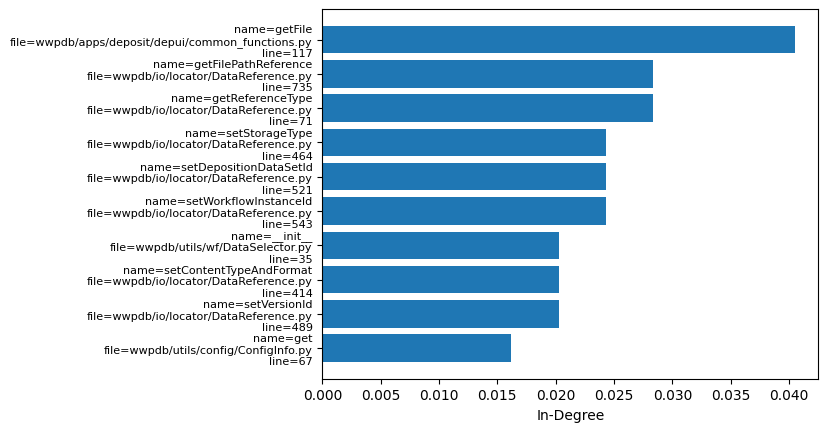

In [7]:
# Plot a horizontal bar chart of the in-degree distribution of the top 10 nodes
import matplotlib.pyplot as plt
import numpy as np

# Sort the nodes based on in-degree
sorted_nodes_by_in_degree = {node: in_degree_centrality[node] for node in sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)}

# Get the top 10 nodes
top_10_nodes_by_in_degree = list(sorted_nodes_by_in_degree.keys())[:10]
top_10_nodes_in_degree = [sorted_nodes_by_in_degree[node] for node in top_10_nodes_by_in_degree]

# Plot the horizontal bar chart
fig, ax = plt.subplots()
y_pos = np.arange(len(top_10_nodes_by_in_degree))
ax.barh(y_pos, top_10_nodes_in_degree, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_nodes_by_in_degree, fontsize=8)  # Decrease font size here
ax.invert_yaxis()
ax.set_xlabel('In-Degree')

plt.show()

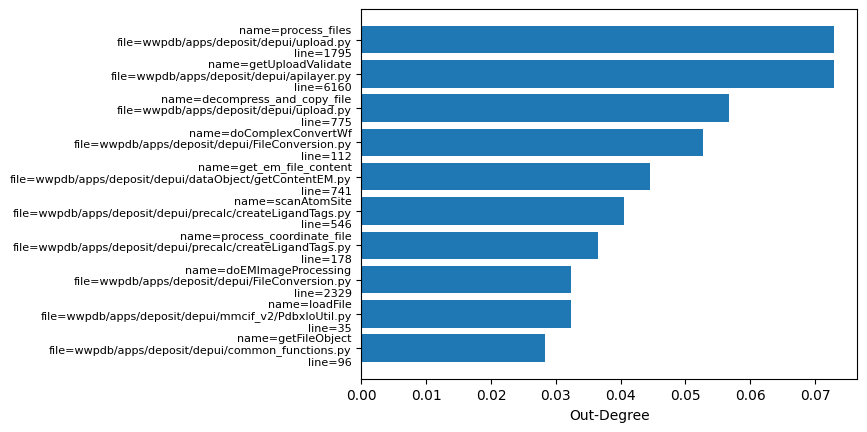

In [8]:
# Plot a horizontal bar chart of the out-degree distribution of the top 10 nodes
import matplotlib.pyplot as plt
import numpy as np

# Sort the nodes based on out-degree
sorted_nodes_by_out_degree = {node: out_degree_centrality[node] for node in sorted(out_degree_centrality, key=out_degree_centrality.get, reverse=True)}

# Get the top 10 nodes
top_10_nodes_by_out_degree = list(sorted_nodes_by_out_degree.keys())[:10]
top_10_nodes_out_degree = [sorted_nodes_by_out_degree[node] for node in top_10_nodes_by_out_degree]

# Plot the horizontal bar chart
fig, ax = plt.subplots()
y_pos = np.arange(len(top_10_nodes_by_out_degree))
ax.barh(y_pos, top_10_nodes_out_degree, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_nodes_by_out_degree, fontsize=8)  # Adjust font size as needed
ax.invert_yaxis()
ax.set_xlabel('Out-Degree')

plt.show()

In [9]:
# Identify nodes having only one incoming and one outgoing edge
nodes_with_one_incoming_and_outgoing_edge = [node for node in G.nodes if G.in_degree(node) == 1 and G.out_degree(node) == 1]
print(f"Nodes with only one incoming and one outgoing edge: {json.dumps(nodes_with_one_incoming_and_outgoing_edge, indent=2)}")

Nodes with only one incoming and one outgoing edge: [
  "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34",
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=do_file_merge\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1667",
  "name=calculate_centre_of_mass_for_xray\nfile=wwpdb/apps/deposit/depui/upload.py\nline=334",
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=add_status\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1324",
  "name=__init__\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=646",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=45",
  "name=selectRows\nfile=wwpdb/utils/wf/dbapi/DbCommand.py\nline=255",
  "name=exist\nfile=wwpdb/utils/wf/dbapi/WfDbApi.py\nline=593",
  "name=__init__\nfile=wwpdb/utils/wf/DataValueContainer.py\nline=34",
  "name=path\nfile=wwpdb/apps/deposit/depui/models.py\nline=199",
  "name=chec

In [10]:
# Given that the graph represents a call stack, identify non-branched paths of deep nested calls
# A non-branched path is a path where each node has only one incoming and one outgoing edge
# Initialize a list to hold all non-branched paths
non_branched_paths = []

# Iterate over nodes with only one outgoing edge to start paths
for start_node in nodes_with_one_outgoing_edge:
    current_path = [start_node]
    current_node = start_node
    
    # Traverse the graph following the non-branched path
    while True:
        # Find the next node if the current node has exactly one outgoing edge and is not an end node
        if current_node in nodes_with_one_incoming_and_outgoing_edge:
            next_node = next(iter(G.successors(current_node)), None)
            if next_node and next_node not in current_path:  # Avoid loops
                current_path.append(next_node)
                current_node = next_node
            else:
                break  # End the path if no next node or loop detected
        else:
            break  # End the path if current node does not meet the criteria
    
    # Save the path if it has more than one node
    if len(current_path) > 1:
        non_branched_paths.append(current_path)

# Print the identified non-branched paths
for i, path in enumerate(non_branched_paths, 1):
    print(f"Path {i}: {json.dumps(path, indent=2)}")

Path 1: [
  "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34",
  "name=__init__\nfile=wwpdb/apps/deposit/depui/PickleUtil.py\nline=45"
]
Path 2: [
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=createTimeStamp\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=644"
]
Path 3: [
  "name=do_file_merge\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1667",
  "name=ss_create_long_event\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1330",
  "name=createLongEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=604",
  "name=createTimeStamp\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=644"
]
Path 4: [
  "name=calculate_centre_of_mass_for_xray\nfile=wwpdb/apps/deposit/depui/upload.py\nline=334",
  "name=getDataType\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=3491"
]
Path 5: [
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=getDataType\nf

In [11]:
# Identify the nodes whose "name" attribute is in camel case
camel_case_nodes = [node for node in nodes if is_camel_case(extract_node_attributes(node)[0]) or has_uppercase(extract_node_attributes(node)[0])]
# camel_case_nodes = [
#     "name=__addMilestoneVariants\nfile=/path/to/file.py\nline=23",
#     "name=getConfigDictionary\nfile=/path/to/another_file.py\nline=45"
# ]
print(f"Nodes with 'name' attribute in camel case: {json.dumps(camel_case_nodes, indent=2)}")
print(f"Number of nodes with 'name' attribute in camel case: {len(camel_case_nodes)}")

# Suggest snake case names for the nodes with camel case names
suggested_names = []
for node in camel_case_nodes:
    name, file, line = extract_node_attributes(node)
    if name is not None:  # Check if name is not None
        suggested_names.append({
            "file": file,
            "line": line,
            "original_name": name,
            "suggested_name": suggest_snake_case_name(name)
        })

print(f"Suggested snake case names: {json.dumps(suggested_names, indent=2)}")
print(f"Number of nodes with camel case names: {len(camel_case_nodes)}")

Nodes with 'name' attribute in camel case: [
  "name=clearUIlock\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=237",
  "name=getFileTypeMatch\nfile=wwpdb/apps/deposit/depui/FileConversion.py\nline=584",
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=writeMileStone\nfile=wwpdb/apps/deposit/depui/common_functions.py\nline=160",
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=fetchItemValue\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=8814",
  "name=__addMilestoneVariants\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=743",
  "name=getConfigDictionary\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=740",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=525",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=45",
  "name=getObject\nfile=wwpdb/utils/wf/dbapi/WfDbApi.py\nline=220",
  "name=selectRows\nfile=wwpdb/utils/wf

In [12]:
# Filter only the suggested names from "wwpdb/apps/deposit/depui/upload.py"
filtered_suggested_names = [suggestion for suggestion in suggested_names if suggestion["file"] == "wwpdb/apps/deposit/depui/upload.py"]
print(f"Suggested snake case names in 'wwpdb/apps/deposit/depui/upload.py': {json.dumps(filtered_suggested_names, indent=2)}")
print(f"Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/upload.py': {len(filtered_suggested_names)}")

Suggested snake case names in 'wwpdb/apps/deposit/depui/upload.py': []
Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/upload.py': 0


In [13]:
# Filter only the suggested names from "wwpdb/apps/deposit/depui/dataObject/getContentEM.py"
filtered_suggested_names = [suggestion for suggestion in suggested_names if suggestion["file"] == "wwpdb/apps/deposit/depui/dataObject/getContentEM.py"]
print(f"Suggested snake case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': {json.dumps(filtered_suggested_names, indent=2)}")
print(f"Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': {len(filtered_suggested_names)}")

Suggested snake case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': []
Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': 0


In [14]:
# Filter only the suggested names from "wwpdb/apps/deposit/depui/apilayer.py"
filtered_suggested_names = [suggestion for suggestion in suggested_names if suggestion["file"] == "wwpdb/apps/deposit/depui/apilayer.py"]
print(f"Suggested snake case names in 'wwpdb/apps/deposit/depui/apilayer.py': {json.dumps(filtered_suggested_names, indent=2)}")
print(f"Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/apilayer.py': {len(filtered_suggested_names)}")

Suggested snake case names in 'wwpdb/apps/deposit/depui/apilayer.py': [
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "9860",
    "original_name": "isNmrLegacyDeposition",
    "suggested_name": "is_nmr_legacy_deposition"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "8814",
    "original_name": "fetchItemValue",
    "suggested_name": "fetch_item_value"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "525",
    "original_name": "getExperiments",
    "suggested_name": "get_experiments"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "3491",
    "original_name": "getDataType",
    "suggested_name": "get_data_type"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "7614",
    "original_name": "getCategoryItems",
    "suggested_name": "get_category_items"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "6160",
    "original_name": "getUploadValid

In [15]:
import json
from networkx.algorithms import community

# Assuming G is your graph object
communities = [list(c) for c in community.asyn_lpa_communities(G)]
print("Communities:", json.dumps(communities, indent=2))

Communities: [
  [
    "name=get_file_for_content_type_format\nfile=wwpdb/apps/deposit/depui/dataObject/getContentEM.py\nline=97",
    "name=complexLogFile\nfile=wwpdb/apps/deposit/depui/FileConversion.py\nline=1257",
    "name=writeMileStone\nfile=wwpdb/apps/deposit/depui/common_functions.py\nline=160",
    "name=__isInteger\nfile=wwpdb/io/locator/DataReference.py\nline=512",
    "name=setPartitionNumber\nfile=wwpdb/io/locator/DataReference.py\nline=603",
    "name=do_file_action\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1700",
    "name=get_coordinate_errors\nfile=wwpdb/apps/deposit/depui/checks/warnings_and_errors.py\nline=258",
    "name=write_out_issues_json\nfile=wwpdb/apps/deposit/depui/precalc/createLigandTags.py\nline=744",
    "name=get_next_pdbx_for_content_type\nfile=wwpdb/apps/deposit/depui/precalc/createLigandTags.py\nline=206",
    "name=getDirPath\nfile=wwpdb/io/locator/PathInfo.py\nline=432",
    "name=getUploadValidate\nfile=wwpdb/apps/deposit/depui/apilayer.py\n

In [16]:
# Calculate in-degree and out-degree centrality
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Print a sample of the results
print("In-Degree Centrality:", json.dumps(sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True), indent=2))
print("Out-Degree Centrality:", json.dumps(sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True), indent=2))

In-Degree Centrality: [
  [
    "name=getFile\nfile=wwpdb/apps/deposit/depui/common_functions.py\nline=117",
    0.04048582995951417
  ],
  [
    "name=getFilePathReference\nfile=wwpdb/io/locator/DataReference.py\nline=735",
    0.02834008097165992
  ],
  [
    "name=getReferenceType\nfile=wwpdb/io/locator/DataReference.py\nline=71",
    0.02834008097165992
  ],
  [
    "name=setStorageType\nfile=wwpdb/io/locator/DataReference.py\nline=464",
    0.024291497975708502
  ],
  [
    "name=setDepositionDataSetId\nfile=wwpdb/io/locator/DataReference.py\nline=521",
    0.024291497975708502
  ],
  [
    "name=setWorkflowInstanceId\nfile=wwpdb/io/locator/DataReference.py\nline=543",
    0.024291497975708502
  ],
  [
    "name=__init__\nfile=wwpdb/utils/wf/DataSelector.py\nline=35",
    0.020242914979757085
  ],
  [
    "name=setContentTypeAndFormat\nfile=wwpdb/io/locator/DataReference.py\nline=414",
    0.020242914979757085
  ],
  [
    "name=setVersionId\nfile=wwpdb/io/locator/DataReference.py

In [24]:
# Find cycles in the graph
cycles = list(nx.simple_cycles(G))
print("Cycles found:", cycles)  # Print a sample of found cycles

Cycles found: []


In [25]:
import json
import networkx as nx

# Assuming G is your graph object
strongly_connected_components = [list(comp) for comp in nx.strongly_connected_components(G)]
weakly_connected_components = [list(comp) for comp in nx.weakly_connected_components(G)]

print("Strongly Connected Components:", json.dumps(sorted(strongly_connected_components, key=len, reverse=True), indent=2))
print("Weakly Connected Components:", json.dumps(sorted(weakly_connected_components, key=len, reverse=True), indent=2))

Strongly Connected Components: [
  [
    "name=__init__\nfile=wwpdb/apps/deposit/depui/PickleUtil.py\nline=45"
  ],
  [
    "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34"
  ],
  [
    "name=basename\nfile=wwpdb/apps/deposit/depui/models.py\nline=195"
  ],
  [
    "name=report_image_errors\nfile=wwpdb/apps/deposit/depui/dataObject/getContentEM.py\nline=577"
  ],
  [
    "name=__init__\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=148"
  ],
  [
    "name=get\nfile=wwpdb/utils/config/ConfigInfo.py\nline=67"
  ],
  [
    "name=__getInternalPath\nfile=wwpdb/io/locator/DataReference.py\nline=870"
  ],
  [
    "name=getReferenceType\nfile=wwpdb/io/locator/DataReference.py\nline=71"
  ],
  [
    "name=__getInternalFileNameBase\nfile=wwpdb/io/locator/DataReference.py\nline=915"
  ],
  [
    "name=getPartitionNumberSearchTarget\nfile=wwpdb/io/locator/DataReference.py\nline=1181"
  ],
  [
    "name=__getInternalPartitionNumber\nfile=wwpdb/io/locator/Da

In [26]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", json.dumps(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5], indent=2))

Betweenness Centrality: [
  [
    "name=getFile\nfile=wwpdb/apps/deposit/depui/common_functions.py\nline=117",
    0.009471928727384438
  ],
  [
    "name=getFileObject\nfile=wwpdb/apps/deposit/depui/common_functions.py\nline=96",
    0.005637295239349154
  ],
  [
    "name=getFilePathReference\nfile=wwpdb/io/locator/DataReference.py\nline=735",
    0.005097954391921016
  ],
  [
    "name=__getInternalFilePath\nfile=wwpdb/io/locator/DataReference.py\nline=971",
    0.0039047744439272033
  ],
  [
    "name=__init__\nfile=wwpdb/utils/config/ConfigInfo.py\nline=52",
    0.0032092426187419767
  ]
]


In [27]:
clustering_coefficient = nx.clustering(nx.Graph(G))
print("Clustering Coefficient:", json.dumps(sorted(clustering_coefficient.items(), key=lambda x: x[1], reverse=True), indent=2))

Clustering Coefficient: [
  [
    "name=basename\nfile=wwpdb/apps/deposit/depui/models.py\nline=195",
    1.0
  ],
  [
    "name=__getInternalFileNameBase\nfile=wwpdb/io/locator/DataReference.py\nline=915",
    1.0
  ],
  [
    "name=__latestVersion\nfile=wwpdb/io/locator/DataReference.py\nline=1105",
    1.0
  ],
  [
    "name=getPartitionNumberSearchTarget\nfile=wwpdb/io/locator/DataReference.py\nline=1181",
    1.0
  ],
  [
    "name=getRequestedCodes\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=3479",
    1.0
  ],
  [
    "name=get_pickle_file_name\nfile=wwpdb/apps/deposit/depui/PickleUtil.py\nline=82",
    1.0
  ],
  [
    "name=does_pickle_exist\nfile=wwpdb/apps/deposit/depui/PickleUtil.py\nline=85",
    1.0
  ],
  [
    "name=__init__\nfile=wwpdb/apps/deposit/depui/mmcif_v2/PdbxCategoryItemSetInstReader.py\nline=41",
    1.0
  ],
  [
    "name=__initBundle\nfile=wwpdb/apps/deposit/depui/mmcif_v2/PdbxCategoryItemSetInstReader.py\nline=273",
    1.0
  ],
  [
    "name=shutil_c

In [28]:
# %pip install python-louvain
import community as community_louvain

partition = community_louvain.best_partition(nx.Graph(G))
print("Community Partition:", json.dumps(dict(sorted(partition.items(), key=lambda x: x[1])), indent=2))

Community Partition: {
  "name=loadFile\nfile=wwpdb/apps/deposit/depui/mmcif_v2/PdbxIoUtil.py\nline=35": 0,
  "name=getPickleBaseDictionary\nfile=wwpdb/apps/deposit/depui/mmcif_dictionary/dictionary_access.py\nline=35": 0,
  "name=getDictionaryPath\nfile=wwpdb/apps/deposit/depui/mmcif_dictionary/dictionary_access.py\nline=18": 0,
  "name=__init__\nfile=wwpdb/apps/deposit/depui/mmcif_dictionary/PdbxDict.py\nline=31": 0,
  "name=__setup\nfile=wwpdb/apps/deposit/depui/mmcif_dictionary/PdbxDict.py\nline=44": 0,
  "name=readSerializedDictionary\nfile=wwpdb/apps/deposit/depui/mmcif_dictionary/PdbxDictionaryLoader.py\nline=61": 0,
  "name=__init__\nfile=wwpdb/apps/deposit/depui/mmcif_dictionary/PdbxDictionaryLoader.py\nline=35": 0,
  "name=__init__\nfile=wwpdb/apps/deposit/depui/mmcif_v2/PdbxCategoryItemSetInstReader.py\nline=41": 0,
  "name=getInstance\nfile=wwpdb/apps/deposit/depui/mmcif_v2/PdbxCategoryItemSetInstReader.py\nline=198": 0,
  "name=getCategoryItemSetNames\nfile=wwpdb/apps/depo

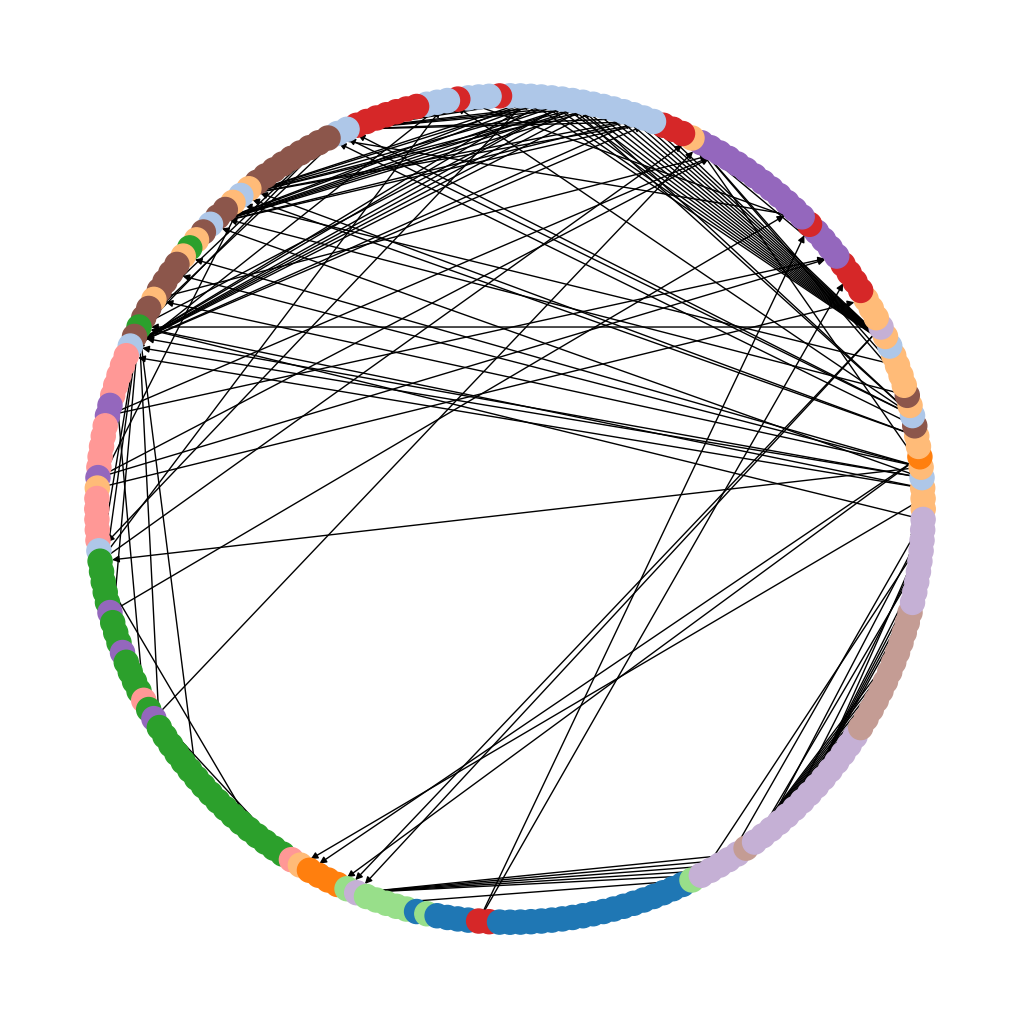

In [33]:
import matplotlib.pyplot as plt

# Draw the graph in a circular layout color-coded by the partition
plt.figure(figsize=(10, 10))
# pos = nx.circular_layout(G)
# nx.draw(G, pos, with_labels=False, node_size=50, font_size=8)
# plt.show()

# Draw the graph in a circular layout color-coded by the partition
pos = nx.circular_layout(G)
cmap = plt.get_cmap("tab20")
node_colors = [cmap(partition[node] % 20) for node in G.nodes]
nx.draw(G, pos, node_color=node_colors, with_labels=False)
plt.show()

In [30]:
# Assuming `G` is your dependency graph
# G = nx.DiGraph()
analysis_results = analyze_dependency_graph(G) # FIXME: Use the isolate examples above to improve the function and get better results
print(analysis_results)

{
  "complex_nodes": {},
  "circular_dependencies": [],
  "strongly_connected_components": [
    [
      "name=__init__\nfile=wwpdb/apps/deposit/depui/PickleUtil.py\nline=45"
    ],
    [
      "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34"
    ],
    [
      "name=basename\nfile=wwpdb/apps/deposit/depui/models.py\nline=195"
    ],
    [
      "name=report_image_errors\nfile=wwpdb/apps/deposit/depui/dataObject/getContentEM.py\nline=577"
    ],
    [
      "name=__init__\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=148"
    ],
    [
      "name=get\nfile=wwpdb/utils/config/ConfigInfo.py\nline=67"
    ],
    [
      "name=__getInternalPath\nfile=wwpdb/io/locator/DataReference.py\nline=870"
    ],
    [
      "name=getReferenceType\nfile=wwpdb/io/locator/DataReference.py\nline=71"
    ],
    [
      "name=__getInternalFileNameBase\nfile=wwpdb/io/locator/DataReference.py\nline=915"
    ],
    [
      "name=getPartitionNumberSearchTarget\nfile=w